In [1]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [2]:
!pip install gdown
!gdown --id 15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW --output /content/newsData.zip

Downloading...
From: https://drive.google.com/uc?id=15kGgL0GGkzZdUzlJZwayDzHA7HZ9hoqW
To: /content/newsData.zip
2.21MB [00:00, 10.3MB/s]


In [3]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [717 kB]
Hit:13 http://ppa.laun

In [4]:
import os
import zipfile

In [5]:
with zipfile.ZipFile('/content/newsData.zip', 'r') as existing_zip:
  # 원본 데이터셋을 압축 해제한 디렉터리 경로
    existing_zip.extractall('/content/newsData')

In [6]:
# 데이터 카테고리
# 0: 정치 (policy)
# 1: 경제 (economy)
# 2: 사회 (social)
# 3: 생활/문화 (culture)
# 4: 세계 (international)
# 5: 과학 (science)
# 6: 연애 (ENT)
# 7. 스포츠 (sports)
original_dataset_dir ='/content/newsData'

policy_dir = original_dataset_dir +'/0'
economy_dir = original_dataset_dir +'/1'
social_dir = original_dataset_dir +'/2'
culture_dir = original_dataset_dir +'/3'
inter_dir = original_dataset_dir +'/4'
science_dir = original_dataset_dir +'/5'
ent_dir = original_dataset_dir +'/6'
sports_dir = original_dataset_dir +'/7'

In [7]:
policy_lst = os.listdir(policy_dir)
economy_lst = os.listdir(economy_dir)
social_lst = os.listdir(social_dir)
culture_lst = os.listdir(culture_dir)
inter_lst = os.listdir(inter_dir)
science_lst = os.listdir(science_dir)
ent_lst = os.listdir(ent_dir)
sports_lst = os.listdir(sports_dir)

In [8]:
policy_lst[:5]

['0108NewsData.txt',
 '0076NewsData.txt',
 '0111NewsData.txt',
 '0190NewsData.txt',
 '0009NewsData.txt']

In [9]:
import re
f = open(os.path.join(policy_dir,'0000NewsData.txt'), 'r', encoding= 'utf-8')
data = re.sub('[\n\'\t]'," ",f.read())
print(data)
f.close()

동남아 담당  北 최희철 부상 베이징 도착…싱가포르행 주목 최 부상, 행선지·방문 목적 질문에는  묵묵부답   (베이징=연합뉴스) 김진방 특파원 = 북한이 북미 정상회담 무산 가능성까지 거론하며 강경한 태도를 보이는 가운데 동남아시아 외교를 담당하는 최희철 북한 외무성 부상이 19일 중국 베이징 서우두(首都) 공항에 모습을 드러냈다.  최 부상은 이날 오전 평양발 고려항공 JS151편을 이용해 베이징 서우두 공항에 도착했다.  최 부상은 최종 목적지를 묻는 취재진의 질문에 아무런 답변을 하지 않고, 북한 대사관 관계자들과 함께 공항을 빠져나갔다.  북미 정상회담을 20여 일 앞둔 상황에서 동남아 외교통인 최 부상이 정상회담 준비 등을 위해 회담 개최 예정지인 싱가포르를 방문할 가능성도 제기되고 있다.  최 부상은 지난 3월에도 아세안(ASEAN·동남아시아국가연합) 의장국이기도 한 싱가포르를 방문해 양국관계와 올해 8월 열리는 아세안지역안보포럼(ARF) 의제 등을 논의한 바 있다.  또 지난해 북핵 문제를 두고 북미 간 긴장관계가 형성됐을 때도 ARF에 참석해 아세안을 상대로 여론전을 펼쳤다. 북한의 초청으로 비자이 쿠마르 싱 인도 외교부 국무장관이 방북했을 때도 최 부상은 싱 국무장관을 직접 영접하고, 한반도 문제를 논의하기도 했다.  베이징 소식통은 "최 부상이 대(對)미 외교담당이 아니기 때문에 싱가포르로 갈 가능성이 큰 것은 아니다"며 "만약 싱가포르에 간다면 정상회담과 관련한 지원 작업 준비 등을 위한 것일 가능성이 크다"고 말했다.


In [10]:
dataset_lst = []
dataset_lab = []
import pandas as pd
sub_rext = '[^a-zA-Zㄱ-ㅣ가-힣0-9 ]'
for doc_num in policy_lst:#0
    f = open(os.path.join(policy_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(0)
        
for doc_num in economy_lst:#1
    f = open(os.path.join(economy_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(1)
    
for doc_num in social_lst:#2
    f = open(os.path.join(social_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(2)
    
for doc_num in culture_lst:#3
    f = open(os.path.join(culture_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(3)
        
for doc_num in inter_lst:#4
    f = open(os.path.join(inter_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(4)
    
for doc_num in science_lst:#5
    f = open(os.path.join(science_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(5)    
        
for doc_num in ent_lst:#6
    f = open(os.path.join(ent_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(6)

for doc_num in sports_lst:#7
    f = open(os.path.join(sports_dir,doc_num), 'r', encoding= 'utf-8')
    data = re.sub(sub_rext," ",f.read())
    f.close()
    dataset_lst.append(data)
    dataset_lab.append(7)

In [11]:
len(dataset_lst)

1600

In [12]:
len(dataset_lab)

1600

In [13]:
import pandas as pd

dataset_df = pd.DataFrame({"data":dataset_lst, "label": dataset_lab})
dataset_df.head()

,data,label
0,원희룡 후보 토론장서 제2공항 반대 주민에게 폭행 당해 종합 가해자 계란 던지...,0
1,원희룡에 달려들어 계란 던지고 폭행 흉기로 자해 시도 앵커 제주시에서 열린 ...,0
2,평화당 국회 본회의 참석 사직서 처리 정족수 확보 예상 장병완 추경과 특검 동...,0
3,김태호 보수 궤멸수준까지 가 있는게 사실 지난 2년 정치 떠나 성찰 시간 가...,0
4,추미애 홍준표 겨냥 한반도 평화 못마땅하다는 사람 있다 19일 진도군수 후보...,0


In [14]:
#pd.read_csv로 csv파일 불러오기
k_stopword = pd.read_csv('/content/korean_stopword.csv')
# list(): 
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의',
                                    '는','에','의','가','이','은','들',
                                    '는','좀','잘','걍','과','도','를',
                                    '을','으로','자', '에','와','한',
                                    '하다','있다','되다','에서']
stopword[:5]

['이', '있', '하', '것', '들']

In [15]:
from konlpy.tag import Okt
okt = Okt()

morphs_lst = []
for i in dataset_df.index:
    #morphs = []
    morphs = ""
    morph = okt.morphs(dataset_df.loc[i]['data'], stem=True)
    for txt in morph:
      if txt not in stopword:
        #morphs.append(txt)
        morphs = morphs + " " + txt
    morphs_lst.append(morphs)
dataset_df['morphs'] = morphs_lst
dataset_df.head()

,data,label,morphs
0,원희룡 후보 토론장서 제2공항 반대 주민에게 폭행 당해 종합 가해자 계란 던지...,0,원희룡 후보 토론 장서 2 공항 반대 주민 에게 폭행 당하다 종합 가해자 계란 던...
1,원희룡에 달려들어 계란 던지고 폭행 흉기로 자해 시도 앵커 제주시에서 열린 ...,0,원희룡 달려들다 계란 던지다 폭행 흉기 자해 시도 앵커 제주시 열리다 제주도 지사...
2,평화당 국회 본회의 참석 사직서 처리 정족수 확보 예상 장병완 추경과 특검 동...,0,평화 당 국회 본회의 참석 사직서 처리 정족수 확보 예상 장병완 추경 특검 동시 ...
3,김태호 보수 궤멸수준까지 가 있는게 사실 지난 2년 정치 떠나 성찰 시간 가...,0,김태호 보수 궤멸수준 가다 지난 2년 정치 떠나다 성찰 가다 경남 위기 아니다 출...
4,추미애 홍준표 겨냥 한반도 평화 못마땅하다는 사람 있다 19일 진도군수 후보...,0,추미애 홍준표 겨냥 한반도 평화 못마땅하다 19일 진도 군수 후보 선거 사무소 개...


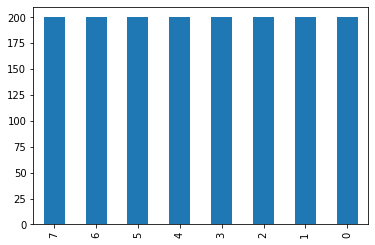

In [16]:
dataset_df['label'].value_counts().plot(kind = 'bar')

In [17]:
print(dataset_df.isnull().values.any())

False


In [18]:
from sklearn.model_selection import train_test_split

X = dataset_df['morphs']
y = dataset_df['label']
X_train , X_test , y_train , y_test = train_test_split(X, y,
                                                       test_size=0.2,  
                                                       random_state=11)

In [19]:
print('학습 데이터의 수 :',X_train.shape[0] )

학습 데이터의 수 : 1280


In [20]:
print('테스트 데이터의 수 :',X_test.shape[0] )

테스트 데이터의 수 : 320


In [21]:
print('### 학습데이터의 라벨 분포 ###')
y_train.value_counts()

### 학습데이터의 라벨 분포 ###


0    166
2    162
5    161
6    160
7    159
1    159
3    158
4    155
Name: label, dtype: int64

In [22]:
print('### 테스트데이터의 라벨 분포 ###')
y_test.value_counts()

### 테스트데이터의 라벨 분포 ###


4    45
3    42
7    41
1    41
6    40
5    39
2    38
0    34
Name: label, dtype: int64

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 정수 인코딩(사전만들기)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [24]:
print(tokenizer.word_index)

{'이다': 1, '인': 2, '돼다': 3, '않다': 4, '하고': 5, '1': 6, '다': 7, '없다': 8, '2': 9, '받다': 10, '보다': 11, '기자': 12, '며': 13, '한국': 14, '3': 15, '에게': 16, '서울': 17, '밝히다': 18, '위': 19, '늘다': 20, '오다': 21, '가다': 22, '따르다': 23, '이라고': 24, '지난': 25, '에는': 26, '4': 27, '5': 28, '아니다': 29, '날': 30, '성': 31, '북한': 32, '부터': 33, '대해': 34, '같다': 35, '당': 36, '미국': 37, '대한': 38, '6': 39, '대통령': 40, '이번': 41, '못': 42, '크다': 43, '위해': 44, '경찰': 45, '통해': 46, '중국': 47, '나오다': 48, 'a': 49, '만': 50, '장': 51, '라고': 52, '이후': 53, '관련': 54, '대표': 55, '보이다': 56, '정부': 57, '에서는': 58, '서': 59, '조사': 60, '함께': 61, '대회': 62, '대': 63, '많다': 64, '7': 65, '김': 66, '게': 67, '의원': 68, '후보': 69, '라며': 70, '지난해': 71, '뒤': 72, '세': 73, '혐의': 74, '기': 75, '대다': 76, '관계자': 77, '들다': 78, '최근': 79, '연': 80, '에도': 81, '진행': 82, '상황': 83, '시장': 84, '간': 85, '달': 86, '확인': 87, '주장': 88, '열리다': 89, '예정': 90, '높다': 91, '좋다': 92, '8': 93, '현재': 94, '9': 95, '결과': 96, '지역': 97, '이상': 98, '설명': 99, '차': 100, '그렇다': 101, '상': 102, '이르다'

In [25]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 25383
등장 빈도가 2번 이하인 희귀 단어의 수: 12904
단어 집합에서 희귀 단어의 비율: 50.83717448686128
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.7816284648958


In [26]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12481


In [27]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

문서의 최대 길이 : 792
문서의 평균 길이 : 270.2890625


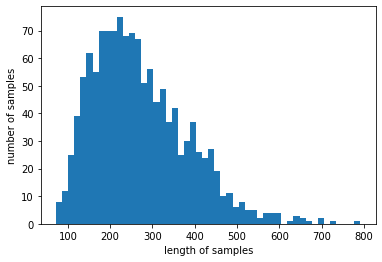

In [28]:
import matplotlib.pyplot as plt

print('문서의 최대 길이 :',max(len(l) for l in X_train))
print('문서의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [30]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 96.640625


In [31]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print('X_train 크기 :',X_train.shape)
print('X_test 크기 : ', X_test.shape)

시퀀스 패딩(sample * time)
X_train 크기 : (1280, 500)
X_test 크기 :  (320, 500)


In [32]:
X_train , X_val , y_train , y_val = train_test_split(X_train, y_train,
                                                     test_size=0.2,  
                                                     random_state=11)

In [33]:
print(len(X_val),len(X_train))

256 1024


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          798784    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          33024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
Total params: 845,544
Trainable params: 845,544
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=10)
# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_LSTM.h5', 
                     monitor='val_acc', mode='max', 
                     verbose=2, save_best_only=True)

In [36]:
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    callbacks=[es, mc], 
                    validation_data = (X_val, y_val))

Epoch 1/30
32/32 [==============================] - 8s 64ms/step - loss: 2.0778 - acc: 0.1455 - val_loss: 2.0694 - val_acc: 0.2148

Epoch 00001: val_acc improved from -inf to 0.21484, saving model to best_model_LSTM.h5
Epoch 2/30
32/32 [==============================] - 1s 32ms/step - loss: 1.8835 - acc: 0.2529 - val_loss: 1.7967 - val_acc: 0.2734

Epoch 00002: val_acc improved from 0.21484 to 0.27344, saving model to best_model_LSTM.h5
Epoch 3/30
32/32 [==============================] - 1s 31ms/step - loss: 1.5052 - acc: 0.3877 - val_loss: 1.4715 - val_acc: 0.4102

Epoch 00003: val_acc improved from 0.27344 to 0.41016, saving model to best_model_LSTM.h5
Epoch 4/30
32/32 [==============================] - 1s 32ms/step - loss: 1.0329 - acc: 0.5850 - val_loss: 1.3191 - val_acc: 0.4844

Epoch 00004: val_acc improved from 0.41016 to 0.48438, saving model to best_model_LSTM.h5
Epoch 5/30
32/32 [==============================] - 1s 32ms/step - loss: 0.8126 - acc: 0.6855 - val_loss: 1.4009 - 

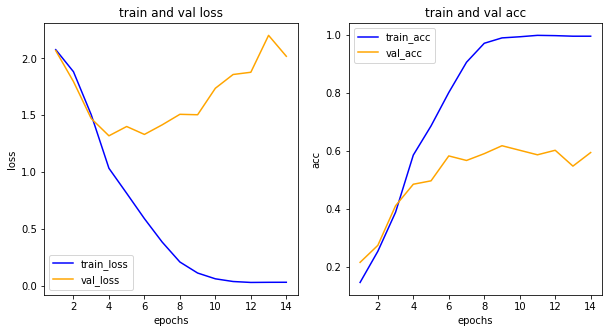

In [37]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [38]:
from tensorflow.keras.models import load_model
loaded_model_LSTM = load_model('best_model_LSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model_LSTM.evaluate(X_test, y_test)[1]))

10/10 [==============================] - 1s 13ms/step - loss: 1.8312 - acc: 0.5781

 테스트 정확도: 0.5781


In [80]:
news_label = ['정치','경제','사회','생활/문화','세계','과학','연애','스포츠']

loaded_model_LSTM = load_model('best_model_LSTM.h5')

def sentiment_predict_LSTM(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_LSTM.predict(pad_new) # 예측
  maximum = np.max(score[0])
  index_of_maximum = np.where(score[0] == maximum)
  print(f'해당 기사의 테마는 {news_label[index_of_maximum[0][0]]}입니다.')

In [84]:
sentiment_predict_LSTM('네이버가 차세대 인공지능(AI) 기술인 오토머신러닝 개발에 나선다. 지난 5월 국내 빅테크 기업 중 최초로 초거대 AI 언어모델인 하이퍼클로바를 공개한 데 이어 미래 먹거리 개발에 나선 것이어서 주목된다.')

해당 기사의 테마는 과학입니다.


In [82]:
sentiment_predict_LSTM('러시아 전문가 홍완석 한국외대 국제지역대학원 교수 인터뷰“미국이 빠져나온 수렁에 反美의 중국, 러시아, 이란 빠트려 아프간 개입이 소련제국의 몰락 앞당겼듯이 중국몽도 와해')

해당 기사의 테마는 세계입니다.
